In [6]:
doc_trump="Mr.Trump became president after winnig the political elections. Thought he lost the support of some republic friends, Trump is friends with president Putin"
doc_election="President says putin  has no political interference is the election outcome He says it was a Wichhut by political parties.He claimed president putin is a friend who had nothing to do with the elections"
doc_putin="Post elections, Vladimir putin became President of Russia.President Putin had served as the prime minister earlier in his political career"
documents=[doc_trump,doc_election,doc_putin]

In [7]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vect = CountVectorizer(stop_words='english')
count_vect = CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix,
                  columns=count_vect.get_feature_names_out(),
                  index=['doc_trump', 'doc_election', 'doc_putin'])

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df,df))

[[1.         0.46413956 0.42426407]
 [0.46413956 1.         0.40842198]
 [0.42426407 0.40842198 1.        ]]


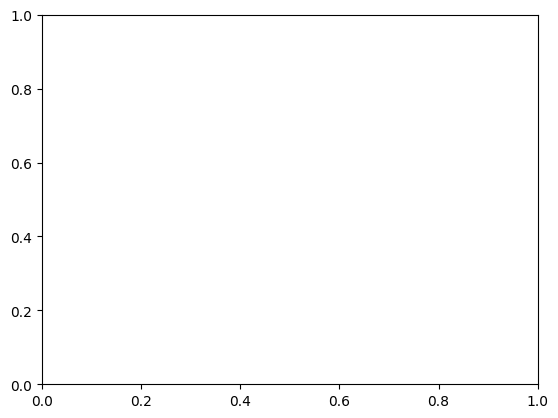

In [9]:
import numpy as np
import matplotlib.pyplot as plt
A=np.array([7,3])
B=np.array([3,7])
ax=plt.axes()

In [10]:
A={1,2,3,4,6}
B={1,2,5,8,9}
C=A.intersection(B)
D=A.union(B)
print('AnB =', C)
print('AUB =', D)
print('j(A,B) = ',float(len(C))/float(len(D)))

AnB = {1, 2}
AUB = {1, 2, 3, 4, 5, 6, 8, 9}
j(A,B) =  0.25


In [11]:
def jaccard_similarity(set1,set2):
    intersection=len(set1.intersection(set2))
    union=len(set1.union(set2))
    return intersection/union
set_a={"Language", "for", "Computer", "NLP", "Science"}
set_b={"NLP", "for", "Language", "Data", "ML", "AI"}
similarity=jaccard_similarity(set_a, set_b)
print("Jaccard Similarity: ",similarity)

Jaccard Similarity:  0.375


In [12]:
# Step 1: Define predefined chatbot responses
responses = [
    "You can return an item within 7 days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on orders over $50.",
    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."
]

In [13]:
user_input="How can I track my order?"

In [14]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]

In [16]:
tfid_matrix = vectorizer.fit_transform(all_texts)

In [17]:
user_vector=tfid_matrix[-1]
response_vectors = tfid_matrix[:1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [18]:
most_similar_idx= np.argmax(cosine_similarities)

In [19]:
print(f"User Query: {user_input}")
print(f"Most revelant response: {responses[most_similar_idx]}")

User Query: How can I track my order?
Most revelant response: You can return an item within 7 days of purchase.


In [20]:
import io 
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

In [21]:
import nltk
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/praneeth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/praneeth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
f = open('input.txt', 'r', errors = 'ignore')
raw = f.read()
raw = raw.lower()

In [24]:
import nltk
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/praneeth/nltk_data'
    - '/Users/praneeth/Desktop/AD/venv/nltk_data'
    - '/Users/praneeth/Desktop/AD/venv/share/nltk_data'
    - '/Users/praneeth/Desktop/AD/venv/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/Users/praneeth/nltk_data'
**********************************************************************


In [25]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))


In [26]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [27]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [30]:
flag = True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
ROBO: Bye! take care..
